# Exploratory Data Analysis

Now that we've cleaned and parsed the data, we can start exploring it and looking for some initial insights.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

## Data Loading

In [2]:
df = pd.read_csv('../Data/parsed_data.csv')

We're going to drop the features that we've noted to be difficult to work with, in the future this may change as I learn more.

In [3]:
drop_features = ['plot', 'metacritic', 'production', 'actors', 'poster', 'director', 'keywords']
df = df.drop(drop_features, axis = 1)

Now we have to fix datatypes that we lost in conversion.

In [5]:
df[df.columns[11:33]] = df[df.columns[11:33]].astype('category')

In [6]:
df[df.columns[35:51]] = df[df.columns[35:51]].astype('category')

In [13]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['dvd_release'] = pd.to_datetime(df['dvd_release'])

## Exploration

Let's go about exploring the data keeping in mind some questions we want to answer:

1. Do certain genres lend themselves to higher return?

2. Do remakes, tent-poles and sequels perform differently?

3. How does the time of year, weather and economic trends influence box office performance?

Let's start with addressing 1.

Text(0.5,0,'Adjusted Box Office Gross')

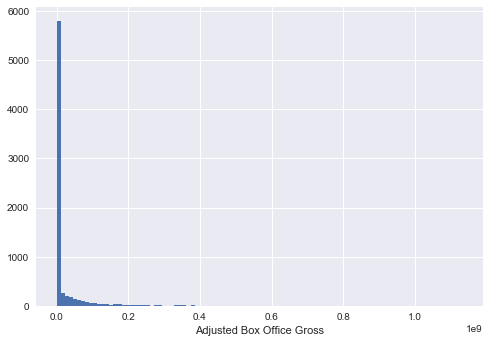

In [24]:
plt.hist(df['inflated_gross'], bins=100)
plt.xlabel('Adjusted Box Office Gross')

Even at 100 bins, the data is very heavily skewed in that small section of the data. Perhaps we have to do some feature engineering. We can look at return in terms of Box Office Gross, or as a percentage of its budget. Let's see how using a ratio between Box Office Gross and Budget performs.

(0.0, 600)

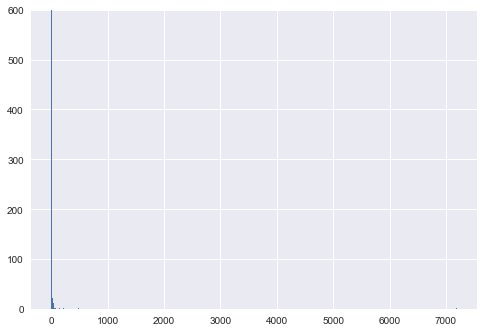

In [82]:
tmp_df = df[df['inflated_budget']>0]
pct_return = tmp_df['inflated_gross']/tmp_df['inflated_budget']
plt.hist(pct_return, bins = 500)
plt.ylim(ymin=0.0, ymax=600)

At first I thought there was an issue with code, but actually the issue became evident after increasing the granularity to an extreme level (bins = 500). There is a massive outlier at 7000. Next, there is a HUGE number of points with 0 as their ratio. This is the graph with only points greater than 0, limited x range, and even further increased granularity.

(0, 5)

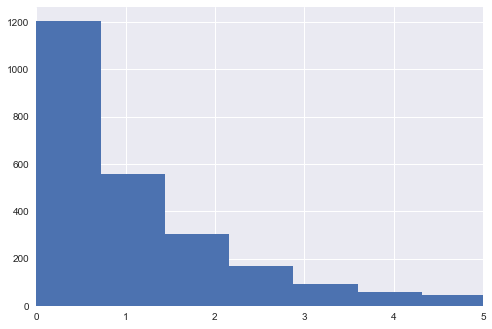

In [98]:
#pct_return.drop(pct_return[pct_return == max(pct_return)].index)
plt.hist(pct_return[pct_return>0], bins = 10000)
plt.xlim(xmin = 0, xmax = 5)

This histogram is clearly still in the same shape as the one for just adjusted box office gross.